In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.cluster
import sklearn.decomposition

import matplotlib.pyplot as plt

In [2]:
file = '../../data/clean/speech.pkl'

In [3]:
df = pd.read_pickle(file)

In [4]:
df.head()

,filename,raw text,year,cleaned text,administration,president,year-president,tokenized_words,normalized_words
0,mensaje-1956-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1956,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1956-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
1,mensaje-1957-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1957,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1957-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
2,mensaje-1958-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1958,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1958-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
3,mensaje-1959-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1959,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1959-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
4,mensaje-1960-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1960,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1960-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."


## K-means

In [5]:
tf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=5, norm='l2')

In [6]:
col = 'cleaned text'

In [7]:
tf_vects = tf_vectorizer.fit_transform(df[col])

In [8]:
terms = tf_vectorizer.get_feature_names()

In [9]:
n_clusters = [3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
for n in n_clusters:
    km = sklearn.cluster.KMeans(n_clusters = n, init='k-means++')
    km.fit(tf_vects)
    df['kmeans' + str(n)] = km.labels_

## PCA

In [11]:
pca = sklearn.decomposition.PCA(n_components = 2).fit(tf_vects.toarray())
reduced_pca = pca.transform(tf_vects.toarray())

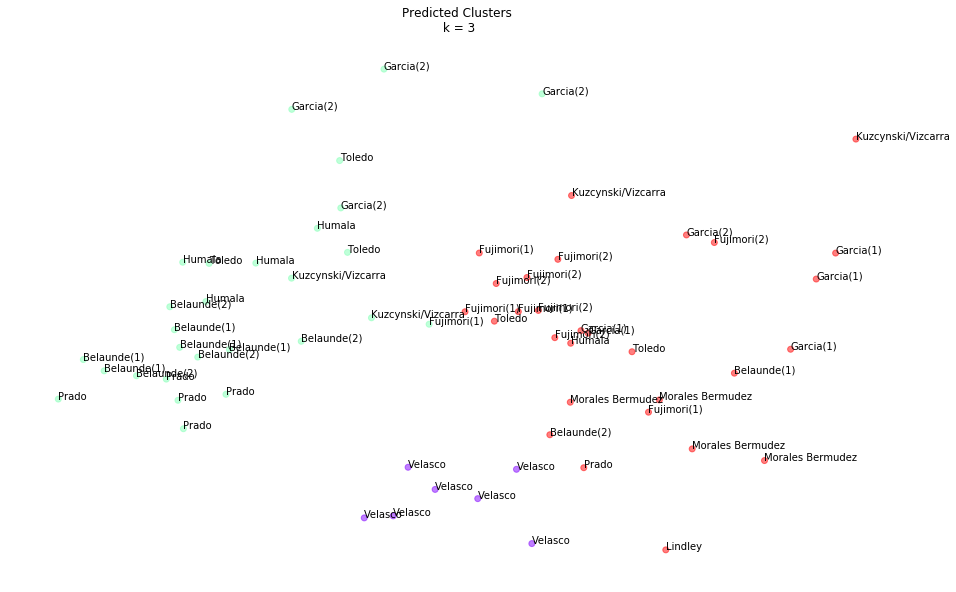

In [12]:
categories = 3
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]

# Plotting
plt.figure(figsize=(16,10))
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

/home/lsanmartin/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


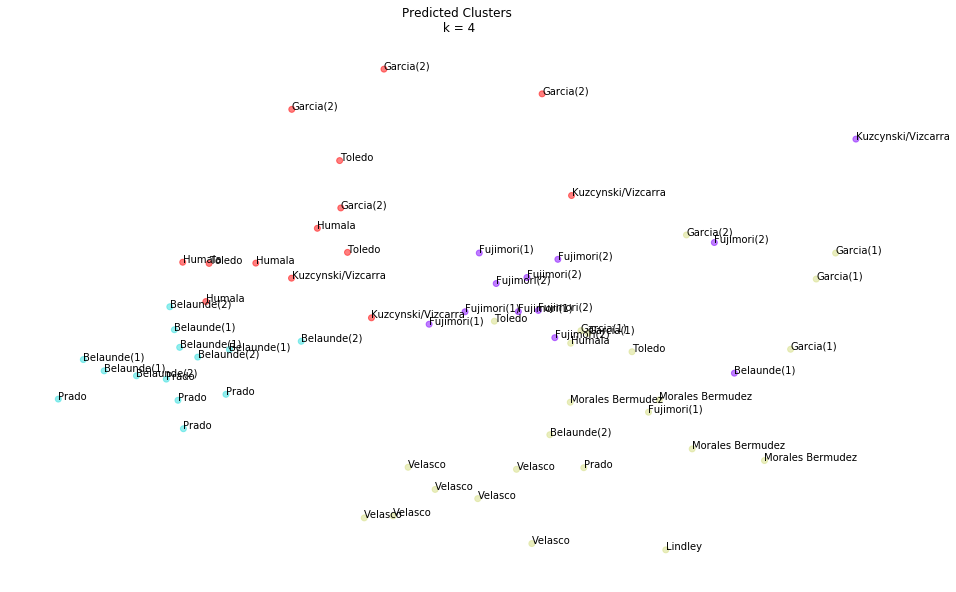

In [13]:
categories = 4
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

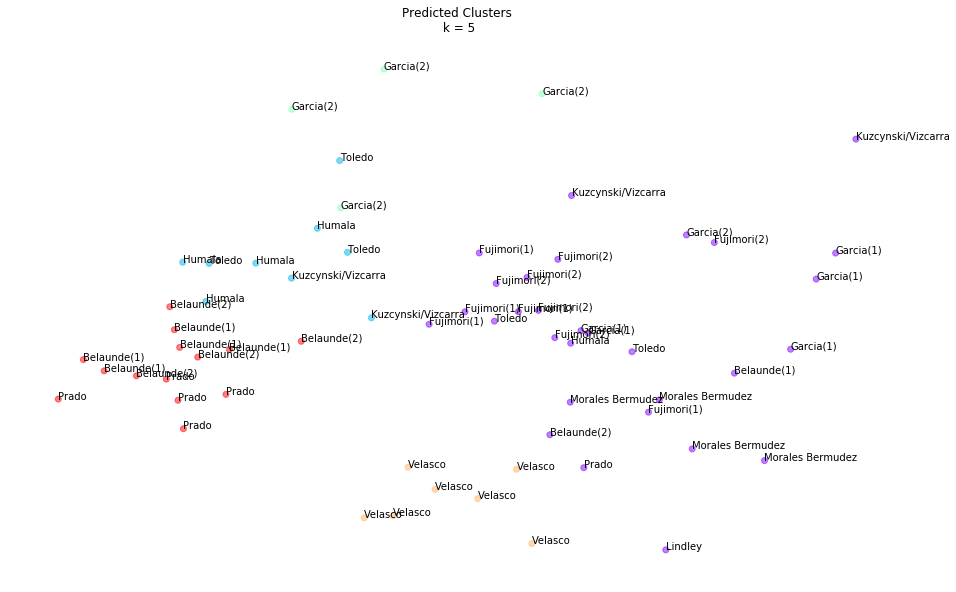

In [14]:
categories = 5
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

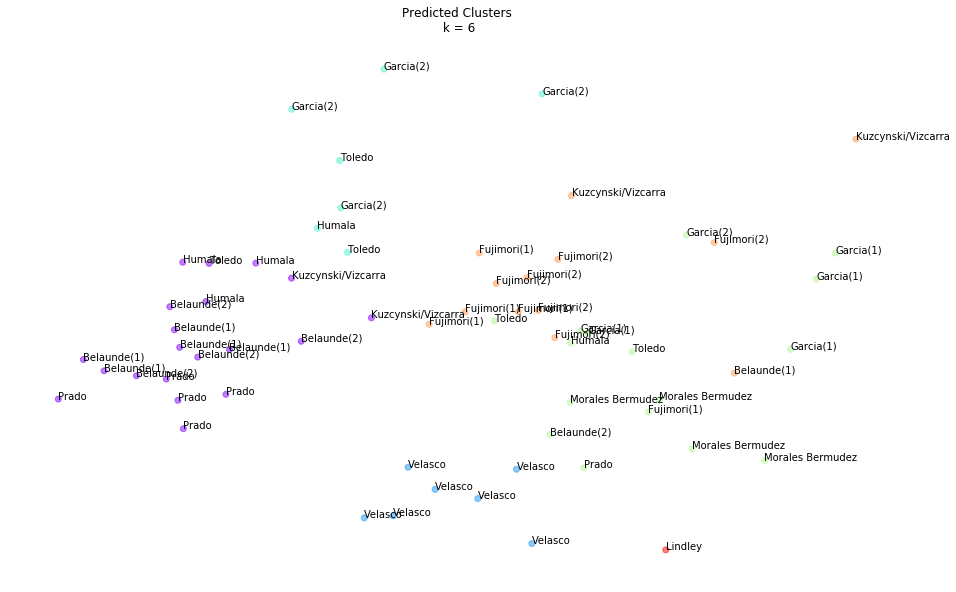

In [15]:
categories = 6
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

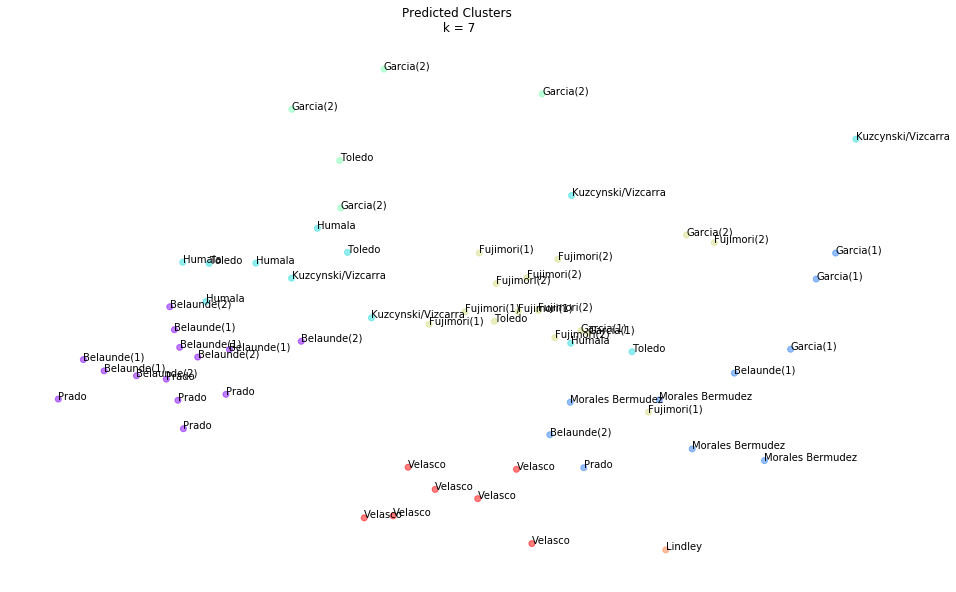

In [16]:
categories = 7
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

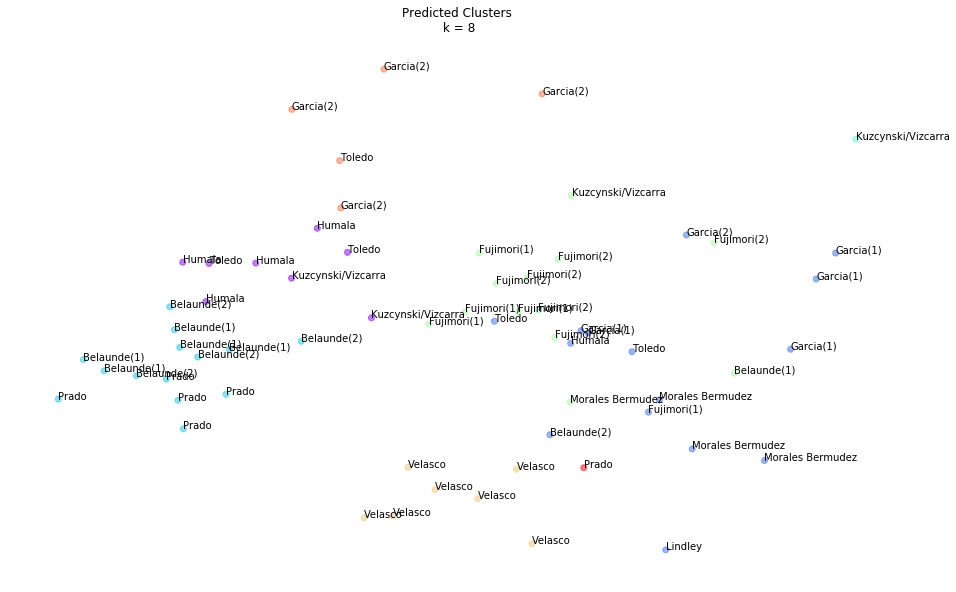

In [17]:
categories = 8
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

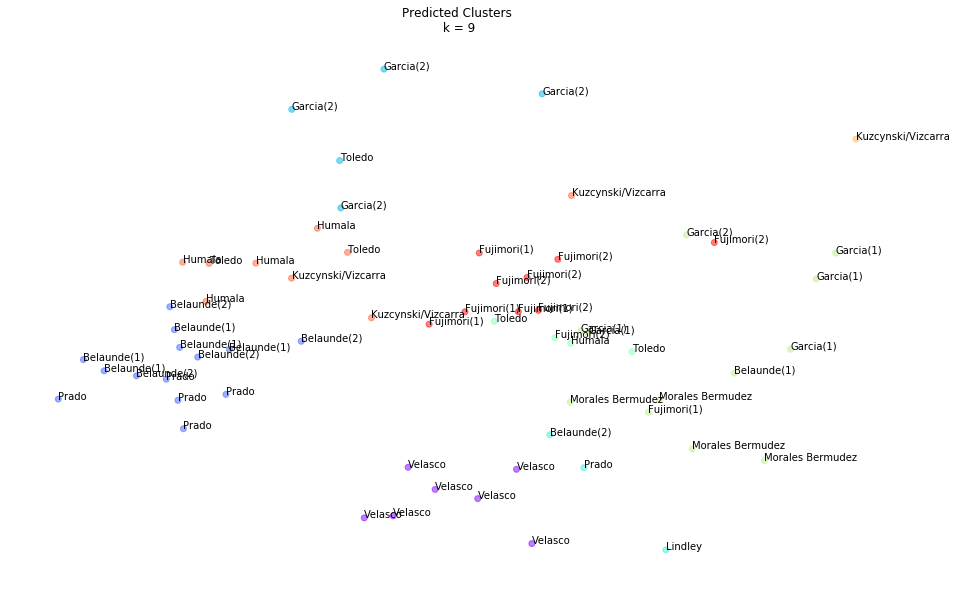

In [18]:
categories = 9
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

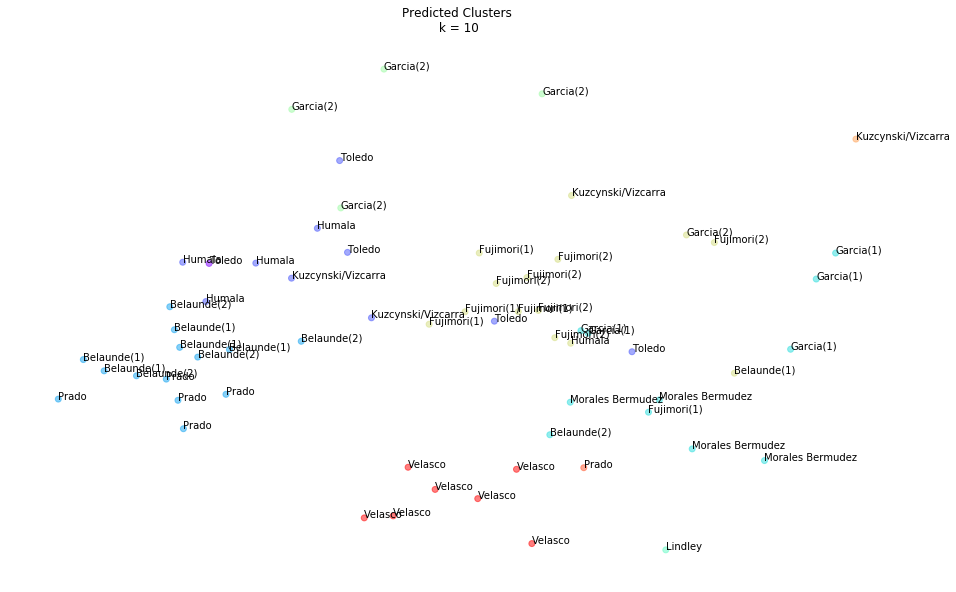

In [19]:
categories = 10
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()